In [214]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from matplotlib import pyplot
from sklearn import preprocessing

In [3]:
loan=pd.read_csv('C:/Users/HUGO/Downloads/loan_data.csv')
loan

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [4]:
loan.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
#see the values of columns
for e in loan.columns:
    x=loan[e].value_counts()
    print(x)
    

1    7710
0    1868
Name: credit.policy, dtype: int64
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64
0.1253    354
0.0894    299
0.1183    243
0.1218    215
0.0963    210
         ... 
0.1941      1
0.1741      1
0.1620      1
0.1746      1
0.1756      1
Name: int.rate, Length: 249, dtype: int64
317.72    41
316.11    34
319.47    29
381.26    27
662.68    27
          ..
248.43     1
181.57     1
197.18     1
515.46     1
258.68     1
Name: installment, Length: 4788, dtype: int64
11.002100    308
10.819778    248
10.596635    224
10.308953    224
10.714418    221
            ... 
9.229358       1
10.381087      1
10.471638      1
11.492641      1
12.223421      1
Name: log.annual.inc, Length: 1987, dtype: int64
0.00     89
10.00    19
0.60     16
13.16    13
19.20    13
         ..
28.70     1
13.48     1
8.07      1


In [6]:
#see the dtypes of columns
for e in loan.columns:
    print(loan[e].dtype)

int64
object
float64
float64
float64
float64
int64
float64
int64
float64
int64
int64
int64
int64


In [7]:
#convert purpose to str
loan['purpose']=loan['purpose'].astype('str')

#label purpose
labelE=preprocessing.LabelEncoder()
loan['purpose']=labelE.fit_transform(loan['purpose'])
loan['purpose']

0       2
1       1
2       2
3       2
4       1
       ..
9573    0
9574    0
9575    2
9576    4
9577    2
Name: purpose, Length: 9578, dtype: int32

In [8]:
#adding one to purpose so we do not start from 0
loan['purpose']=(loan['purpose']+1)
loan['purpose']

0       3
1       2
2       3
3       3
4       2
       ..
9573    1
9574    1
9575    3
9576    5
9577    3
Name: purpose, Length: 9578, dtype: int32

In [9]:
#converting purpose to dummies:
d=['purpose']
loan_dummy=pd.get_dummies(loan, columns=d)
loan_dummy


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_1,purpose_2,purpose_3,purpose_4,purpose_5,purpose_6,purpose_7
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,0,1,0,0


In [28]:
for e in loan_dummy.columns:
    print(loan_dummy[e].dtype)

int64
float64
float64
float64
float64
int64
float64
int64
float64
int64
int64
int64
int64
uint8
uint8
uint8
uint8
uint8
uint8
uint8


In [11]:
for e in loan_dummy.columns:
    print(e)

credit.policy
int.rate
installment
log.annual.inc
dti
fico
days.with.cr.line
revol.bal
revol.util
inq.last.6mths
delinq.2yrs
pub.rec
not.fully.paid
purpose_1
purpose_2
purpose_3
purpose_4
purpose_5
purpose_6
purpose_7


In [12]:
#rename columns:
loan_dummy.rename(columns={'purpose_1':'ppse_allOther','purpose_2':'ppse_CreditCard','purpose_3':'ppse_DebtConsol','purpose_4':'ppse_Educ','purpose_5':'ppse_HomeImprov','purpose_6':'ppse_MajPurchase','purpose_7':'ppse_SmallBusiness'},inplace=True)

In [13]:
#selecting columns based on positive condition:

columnas=['ppse_allOther','ppse_CreditCard','ppse_DebtConsol','ppse_Educ','ppse_HomeImprov','ppse_MajPurchase','ppse_SmallBusiness']

for e in loan_dummy[columnas]:
    x=loan_dummy[e].value_counts()
    print(x)
    
# loan_dummy['purpose_7'].value_counts()

0    7247
1    2331
Name: ppse_allOther, dtype: int64
0    8316
1    1262
Name: ppse_CreditCard, dtype: int64
0    5621
1    3957
Name: ppse_DebtConsol, dtype: int64
0    9235
1     343
Name: ppse_Educ, dtype: int64
0    8949
1     629
Name: ppse_HomeImprov, dtype: int64
0    9141
1     437
Name: ppse_MajPurchase, dtype: int64
0    8959
1     619
Name: ppse_SmallBusiness, dtype: int64


In [14]:
signif=(0.05*len(loan))
signif

478.90000000000003

In [15]:
#drop purpose columns based on previous condition

cols=[]
for e in loan_dummy[columnas]:
    x=len(loan_dummy[loan_dummy[e]==1])
    if x < signif:
        cols.append(e)
    else:
        pass
cols    
    

['ppse_Educ', 'ppse_MajPurchase']

In [16]:
#drop those columns:

loan_dummy=loan_dummy.drop(cols, axis=1)
loan_dummy

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,ppse_allOther,ppse_CreditCard,ppse_DebtConsol,ppse_HomeImprov,ppse_SmallBusiness
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0


In [17]:
loan_dummy.isnull().any()

credit.policy         False
int.rate              False
installment           False
log.annual.inc        False
dti                   False
fico                  False
days.with.cr.line     False
revol.bal             False
revol.util            False
inq.last.6mths        False
delinq.2yrs           False
pub.rec               False
not.fully.paid        False
ppse_allOther         False
ppse_CreditCard       False
ppse_DebtConsol       False
ppse_HomeImprov       False
ppse_SmallBusiness    False
dtype: bool

In [18]:
for e in loan_dummy.columns:
    print(loan_dummy[e].dtype)

int64
float64
float64
float64
float64
int64
float64
int64
float64
int64
int64
int64
int64
uint8
uint8
uint8
uint8
uint8


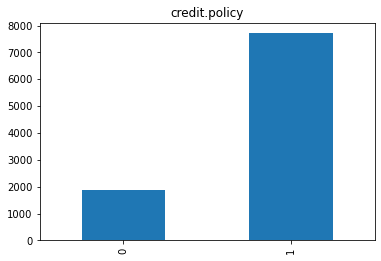

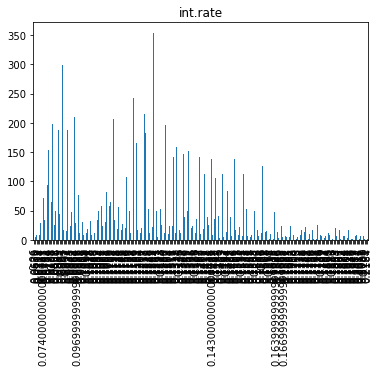

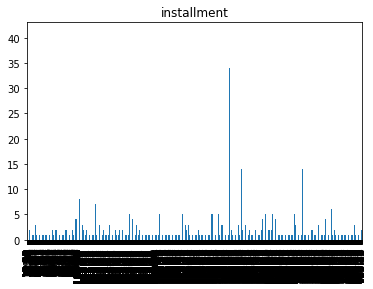

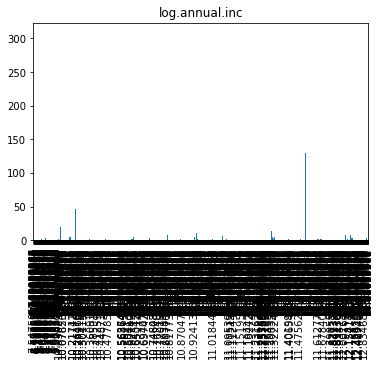

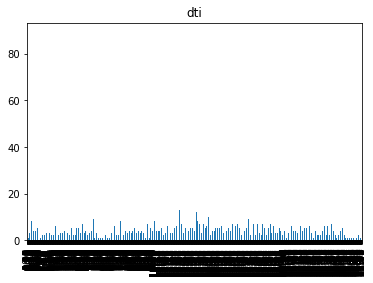

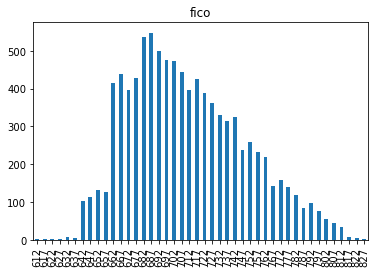

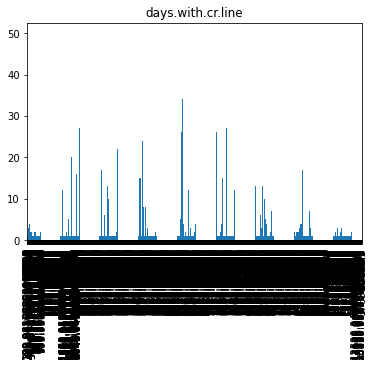

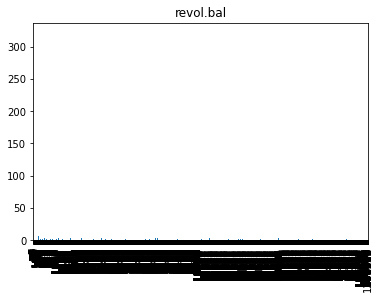

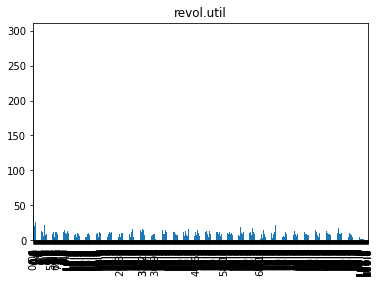

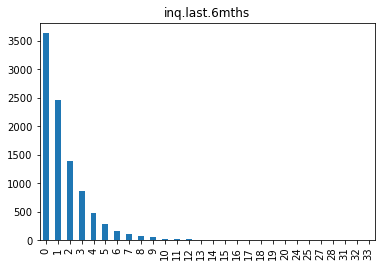

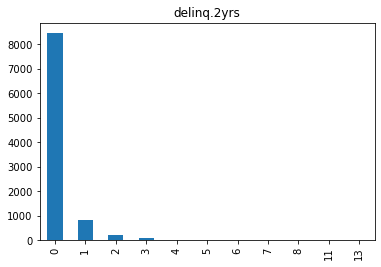

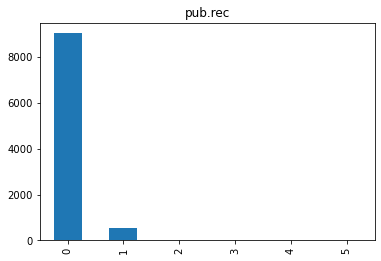

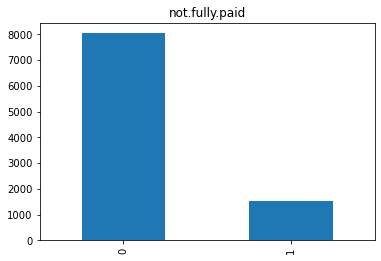

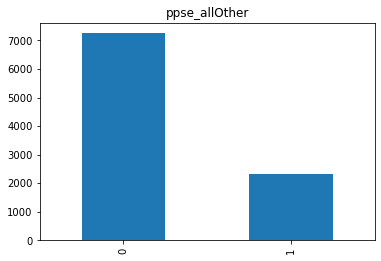

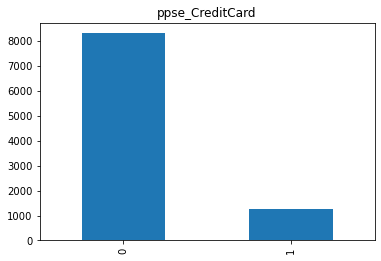

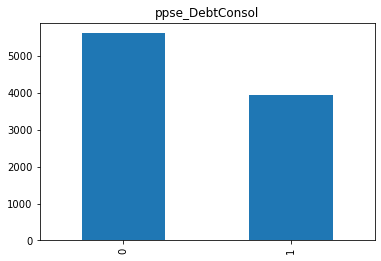

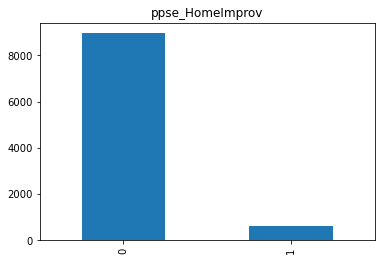

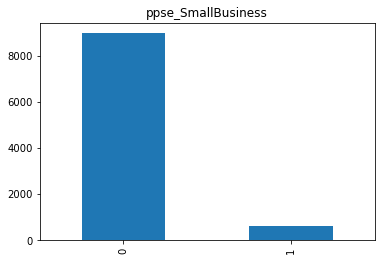

In [19]:
#histograms

for e in loan_dummy:
    loan_dummy[e].value_counts().sort_index().plot.bar(title=e)  
    plt.show()

In [53]:
loan_dummy['not.fully.paid'].value_counts(1)

0    0.839946
1    0.160054
Name: not.fully.paid, dtype: float64

In [180]:
#Deal with the imbalanced data: RandomOverSampler:
x=loan_dummy.loc[:,loan_dummy.columns != 'not.fully.paid']
y=loan_dummy['not.fully.paid']

balanc=RandomOverSampler(random_state=12,sampling_strategy=.65)

#implementing oversampling to correct imbalanced data:
x_train_b, y_train_b=balanc.fit_sample(x,y)

print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_b)))


Original dataset shape Counter({0: 8045, 1: 1533})
Resampled dataset shape Counter({0: 8045, 1: 5229})


In [181]:
#scale the data:
scaler=preprocessing.MinMaxScaler()
columnas=['installment','log.annual.inc','dti','days.with.cr.line','revol.bal','revol.util','pub.rec','fico','inq.last.6mths','delinq.2yrs']
x_train_bs=scaler.fit_transform(x_train_b[columnas])
x_train_bscal=pd.DataFrame(x_train_bs,columns=columnas)
x_train_bscal

,installment,log.annual.inc,dti,days.with.cr.line,revol.bal,revol.util,pub.rec,fico,inq.last.6mths,delinq.2yrs
0,0.879888,0.544762,0.650200,0.312754,0.023898,0.437815,0.0,0.581395,0.000000,0.000000
1,0.229916,0.506334,0.476969,0.147818,0.027848,0.644538,0.0,0.441860,0.000000,0.000000
2,0.379883,0.404820,0.388184,0.259495,0.002908,0.215126,0.0,0.325581,0.030303,0.000000
3,0.158653,0.544762,0.270360,0.144379,0.027885,0.615126,0.0,0.465116,0.030303,0.000000
4,0.094378,0.537503,0.499666,0.222613,0.003926,0.331933,0.0,0.255814,0.000000,0.076923
...,...,...,...,...,...,...,...,...,...,...
13269,0.027324,0.494868,0.102804,0.056757,0.002338,0.552101,0.0,0.441860,0.090909,0.000000
13270,0.400067,0.494868,0.191589,0.094556,0.006776,0.731092,0.0,0.209302,0.000000,0.000000
13271,0.244875,0.453657,0.638184,0.152800,0.021974,0.442017,0.0,0.186047,1.000000,0.000000
13272,0.521153,0.550166,0.244993,0.165001,0.012961,0.384874,0.0,0.488372,0.030303,0.000000


In [182]:
#merge the two dataframes:
c=['credit.policy','int.rate','ppse_allOther','ppse_CreditCard','ppse_DebtConsol','ppse_HomeImprov','ppse_SmallBusiness']
x2=x_train_b[c]
x2
x_train_bss=x_train_bscal.join(x2)
x_train_bss

,installment,log.annual.inc,dti,days.with.cr.line,revol.bal,revol.util,pub.rec,fico,inq.last.6mths,delinq.2yrs,credit.policy,int.rate,ppse_allOther,ppse_CreditCard,ppse_DebtConsol,ppse_HomeImprov,ppse_SmallBusiness
0,0.879888,0.544762,0.650200,0.312754,0.023898,0.437815,0.0,0.581395,0.000000,0.000000,1,0.1189,0,0,1,0,0
1,0.229916,0.506334,0.476969,0.147818,0.027848,0.644538,0.0,0.441860,0.000000,0.000000,1,0.1071,0,1,0,0,0
2,0.379883,0.404820,0.388184,0.259495,0.002908,0.215126,0.0,0.325581,0.030303,0.000000,1,0.1357,0,0,1,0,0
3,0.158653,0.544762,0.270360,0.144379,0.027885,0.615126,0.0,0.465116,0.030303,0.000000,1,0.1008,0,0,1,0,0
4,0.094378,0.537503,0.499666,0.222613,0.003926,0.331933,0.0,0.255814,0.000000,0.076923,1,0.1426,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13269,0.027324,0.494868,0.102804,0.056757,0.002338,0.552101,0.0,0.441860,0.090909,0.000000,1,0.1385,1,0,0,0,0
13270,0.400067,0.494868,0.191589,0.094556,0.006776,0.731092,0.0,0.209302,0.000000,0.000000,0,0.1450,1,0,0,0,0
13271,0.244875,0.453657,0.638184,0.152800,0.021974,0.442017,0.0,0.186047,1.000000,0.000000,0,0.1482,0,0,1,0,0
13272,0.521153,0.550166,0.244993,0.165001,0.012961,0.384874,0.0,0.488372,0.030303,0.000000,1,0.1189,0,0,1,0,0


In [183]:
#model 
#split dataset

X_train, X_test, y_train, y_test = train_test_split(x_train_bss, y_train_b, test_size=0.80,random_state=10) # 75% training and 25% test

In [184]:
#RandomForestClassifier
loan_RFC=RandomForestClassifier(n_estimators=100)
loan_RFC.fit(X_train,y_train)

RandomForestClassifier()

In [185]:
#Predict the response for test dataset
y_pred = loan_RFC.predict(X_test)

In [186]:
#accuracy of the model:
cmrf=confusion_matrix(y_test, y_pred)
                       
def acc(cm):
    
    acc=(cm[0][0]+cm[1][1])/cm.sum()
    return(acc) 

acc(cmrf)  #77.40%

0.7740112994350282

In [187]:
cmrf

array([[5552,  904],
       [1496, 2668]], dtype=int64)

In [188]:
#precision of the model

def prec(cm):
    rec=(cm[1][1])/(cm[0][1]+cm[1][1])
    return(rec)

prec(cmrf) #74.69%

0.7469204927211646

In [189]:
#recall of the model:
def rec(cm):
    rec=(cm[1][1])/(cm[1][0]+cm[1][1])
    return(rec)

rec(cmrf)  #64.07%

0.6407300672430355

In [193]:
#feature importance:
importances=loan_RFC.feature_importances_

# summarize feature importance
for i,v in zip(X_train.columns,enumerate(importances)):
	print('Feature: {}, Score: {}'.format(i,v))

Feature: installment, Score: (0, 0.10967315362464877)
Feature: log.annual.inc, Score: (1, 0.10184064694540301)
Feature: dti, Score: (2, 0.10718774800765382)
Feature: days.with.cr.line, Score: (3, 0.10880790694009732)
Feature: revol.bal, Score: (4, 0.10497751441320914)
Feature: revol.util, Score: (5, 0.10969171352900417)
Feature: pub.rec, Score: (6, 0.009740314360194104)
Feature: fico, Score: (7, 0.08240227316088918)
Feature: inq.last.6mths, Score: (8, 0.058582190829514914)
Feature: delinq.2yrs, Score: (9, 0.015952655316188682)
Feature: credit.policy, Score: (10, 0.026056101286619036)
Feature: int.rate, Score: (11, 0.1078163989689295)
Feature: ppse_allOther, Score: (12, 0.01353743565687104)
Feature: ppse_CreditCard, Score: (13, 0.009509003204952038)
Feature: ppse_DebtConsol, Score: (14, 0.015223960842813909)
Feature: ppse_HomeImprov, Score: (15, 0.004848066251908123)
Feature: ppse_SmallBusiness, Score: (16, 0.014152916661103302)


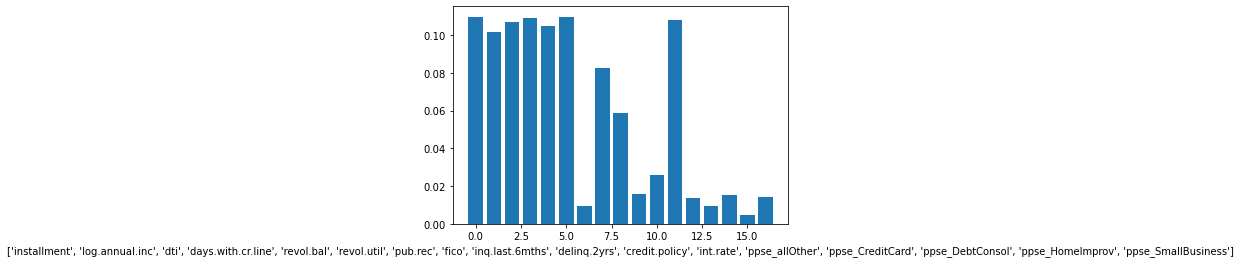

In [208]:
# plot feature importance
pyplot.bar([x for x in range(len(importances))], importances)
pyplot.xlabel([x for x in X_train.columns])
pyplot.show()

In [231]:
#RandomForestRegressor
y_trainR=y_train+1  #to avoid division by zero in accuracy
y_testR=y_test+1
loan_RFR=RandomForestRegressor(n_estimators=100)
loan_RFR.fit(X_train,y_trainR)

RandomForestRegressor()

In [232]:
#Predict the response for test dataset
y_predR = loan_RFR.predict(X_test)

In [233]:
# Calculate the absolute errors
errors = abs(y_predR - y_testR)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
#Mean Absolute Error: 0.35 degrees.

Mean Absolute Error: 0.35 degrees.


In [234]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_testR)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
#Accuracy: 72.3 %.

Accuracy: 72.3 %.


1704     0.24
8394     0.42
145      0.60
3448     0.00
1301     0.41
         ... 
12172    0.09
6727     0.03
8801     0.39
2783     0.14
6301     0.22
Name: not.fully.paid, Length: 10620, dtype: float64

In [224]:
yt1=y_test+1

In [239]:
#feature importance:
importancesR=loan_RFR.feature_importances_

# summarize feature importance
for i,v in zip(X_train.columns,enumerate(importancesR)):
	print('Feature: {}, Score: {}'.format(i,v))

Feature: installment, Score: (0, 0.11334341013529609)
Feature: log.annual.inc, Score: (1, 0.10679926618277474)
Feature: dti, Score: (2, 0.10943485227076279)
Feature: days.with.cr.line, Score: (3, 0.11687649777760212)
Feature: revol.bal, Score: (4, 0.1015470050578615)
Feature: revol.util, Score: (5, 0.11140373133389828)
Feature: pub.rec, Score: (6, 0.010036899972354067)
Feature: fico, Score: (7, 0.06986887533135938)
Feature: inq.last.6mths, Score: (8, 0.04589258681964232)
Feature: delinq.2yrs, Score: (9, 0.013527599466263036)
Feature: credit.policy, Score: (10, 0.040157766299745885)
Feature: int.rate, Score: (11, 0.11071576390784363)
Feature: ppse_allOther, Score: (12, 0.010500691900640523)
Feature: ppse_CreditCard, Score: (13, 0.008428748335988678)
Feature: ppse_DebtConsol, Score: (14, 0.011267834594055153)
Feature: ppse_HomeImprov, Score: (15, 0.004601693578282371)
Feature: ppse_SmallBusiness, Score: (16, 0.015596777035629334)


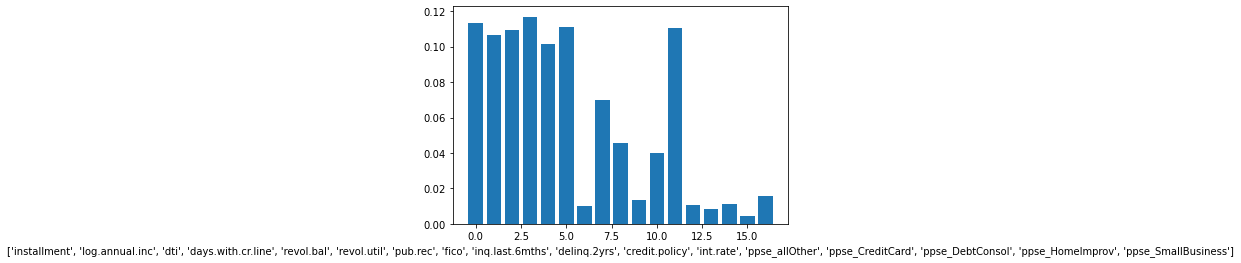

In [240]:
# plot feature importance
pyplot.bar([x for x in range(len(importancesR))], importancesR)
pyplot.xlabel([x for x in X_train.columns])
pyplot.show()

In [242]:
importances-importancesR
#the change in importances of the variables is minimum

array([-0.00367026, -0.00495862, -0.0022471 , -0.00806859,  0.00343051,
       -0.00171202, -0.00029659,  0.0125334 ,  0.0126896 ,  0.00242506,
       -0.01410167, -0.00289936,  0.00303674,  0.00108025,  0.00395613,
        0.00024637, -0.00144386])